In [1]:
import sys

sys.path.append("..")

import numpy as np

from utils import tf_config, preprocess_data, search_algorithms, train, bnn_utils, outlier_utils, eeg_utils, viz_utils

import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.gridspec import GridSpec

from scipy.ndimage import rotate

raw_eeg=False#time or frequency features? raw-time nonraw-frequency
resampling=False
resample_setting=["noresampling", "resampling"]
if(raw_eeg):
    analysis_setting="time"
else:
    analysis_setting="frequency"
dataset="01"
memory_limit=4000
n_individuals=10
interval_eeg=6

train_data, _ = preprocess_data.dataset(dataset, n_individuals=n_individuals, 
                                               raw_eeg=raw_eeg,
                                                interval_eeg=interval_eeg, 
                                                ind_volume_fit=False,
                                                standardize_fmri=True,
                                                iqr=False,
                                                verbose=True)
_, fmri_train=train_data

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy
I: Starting to Load Data
I: Finished Loading Data
I: Pairs Created


In [4]:
def plot_3D_representation_projected_slices(instance, factor=3, h_resolution=1, v_resolution=1):
    label = "$Z_{"
    
    fig = plt.figure(figsize=(25,7))
    gs = GridSpec(2, 7, figure=fig, wspace=0.01, hspace=0.05)#, wspace=-0.4)

    axes = fig.add_subplot(gs[:,0:2], projection='3d', proj_type='ortho')
    
    cmap = plt.get_cmap(plt.cm.nipy_spectral)
    cmap.set_over("w")
    
    x, y = np.mgrid[0:instance[:,:,0].shape[0], 0:instance[:,:,0].shape[1]]
    
    #normalization
    instance = (instance[:,:,:,:]-np.amin(instance[:,:,:,:]))/(np.amax(instance[:,:,:,:])-np.amin(instance[:,:,:,:]))
    instance[np.where(instance < 0.37)]= 1.001
    #renormalization
    instance[np.where(instance <=1.0)] = (instance[np.where(instance <=1.0)]-np.amin(instance[np.where(instance <=1.0)]))/(np.amax(instance[np.where(instance <=1.0)])-np.amin(instance[np.where(instance <=1.0)]))

    for axis in range((instance[:,:,:].shape[2])//factor):
        img = rotate(instance[:,:,axis*factor,0], 90)

        ax = axes.plot_surface(x,y,np.ones(x.shape)+5*(axis),
                                facecolors=cmap(img), cmap=cmap, 
                                shade=False, antialiased=True, zorder=0,
                                cstride=v_resolution, rstride=h_resolution)

        axes.text(60, 60, 3+5*(axis), label+str(axis*factor)+"}$", size=13, zorder=100)

    #axes.text(60, 60, 20+5*(instance[:,:,:].shape[2])//factor, "3-Dimensional sliced representation", size=13, zorder=100)
    cbaxes = fig.add_axes([0.13, 0.15, 0.01, 0.7])  # This is the position for the colorbar
    cb = plt.colorbar(ax, cax = cbaxes)

    axes.axis("off")
    axes.view_init(elev=5.5, azim=7)#(100,150)
    axes.dist = 5
    
    #plot each slice in 2 Dimensional plot
    row = 1
    col = 6
    for axis in range((instance[:,:,:].shape[2])//factor):
        axes = fig.add_subplot(gs[row,col])
        
        img = rotate(instance[:,:,axis*factor,0], 90)
        
        axes.imshow(cmap(img))
        axes.text(28, 1, label+str(axis*factor)+"}$", size=13,
             va="baseline", ha="left", multialignment="left",)

        axes.axis("off")

        col -= 1
        if(col == 1):
            col=6
            row-=1

    plt.rc('font', family='times')

    return fig

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


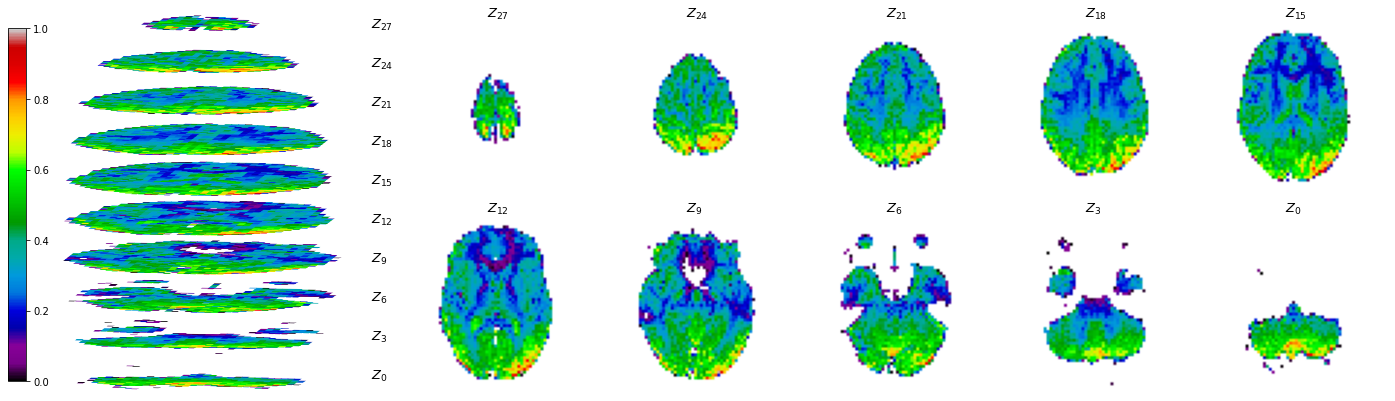

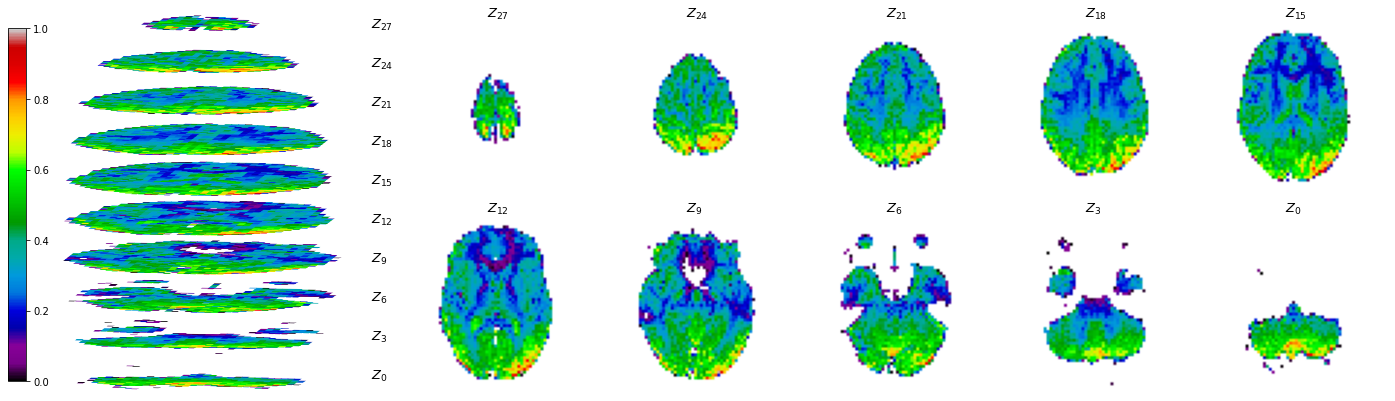

In [5]:
plot_3D_representation_projected_slices(fmri_train[1])

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


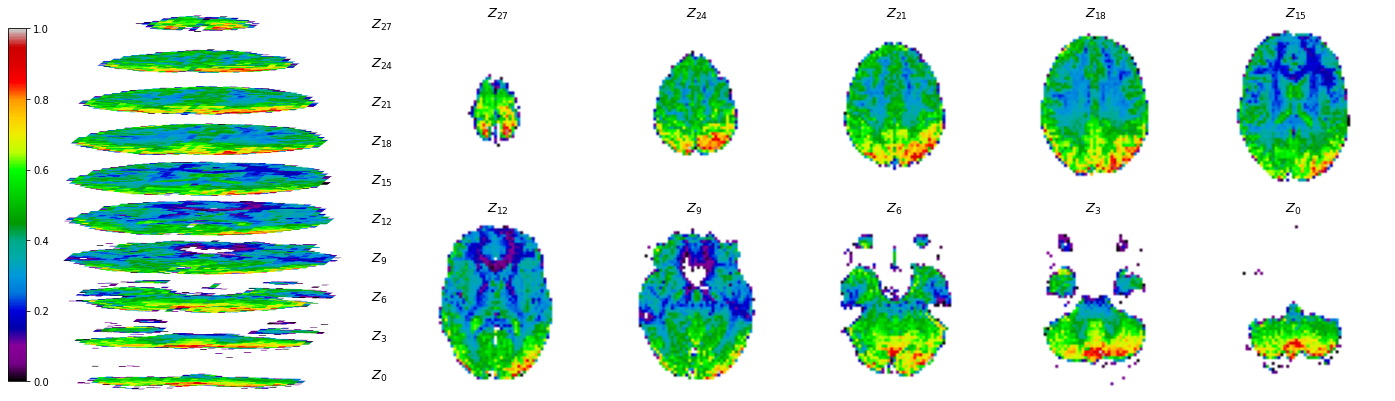

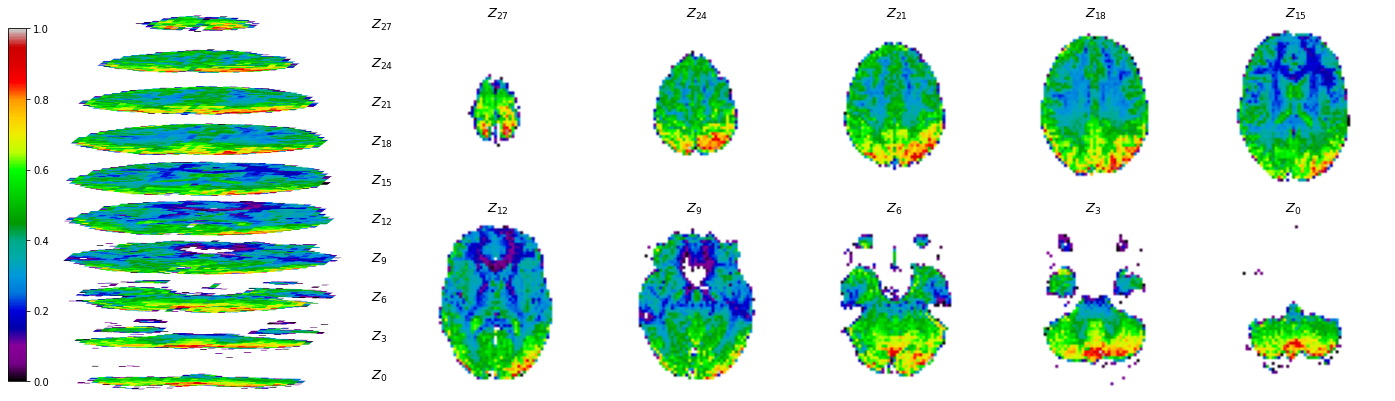

In [4]:
viz_utils.plot_3D_representation_projected_slices(fmri_train[1])